In [1]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = '../Dataset/Embedding/'
outputFilename = 'conventionalOutput.csv'

## With Word Embedding (BoW) Dataset

In [3]:
X = pd.read_csv(path+'kolkata_WE_100.csv')
Y = pd.read_csv(path+'kolkata_classLabel_named.csv')
print(X.shape,Y.shape)

(8329, 100) (8329, 2)


In [4]:
Y

,Unnamed: 0,label
0,0,Vehicle breakdown
1,1,Roads related congestion
2,2,Vehicle breakdown
3,3,Roads related congestion
4,4,Vehicle breakdown
...,...,...
8324,8324,Roads related congestion
8325,8325,City program
8326,8326,Roads related congestion
8327,8327,Closed Avenue


In [5]:
Y.label.value_counts()

City program                2150
Roads related congestion    1811
Vehicle breakdown           1636
Closed Avenue               1375
Others                      1103
Road blockage                254
Name: label, dtype: int64

In [6]:
labels = Y.label.unique()
labels.sort()
labels

array(['City program', 'Closed Avenue', 'Others', 'Road blockage',
       'Roads related congestion', 'Vehicle breakdown'], dtype=object)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, Y['label'])
print(X_train.shape, X_test.shape)

(6246, 100) (2083, 100)


In [8]:
model = GaussianNB()

model.fit(X_train,y_train)

GaussianNB()

In [9]:
y_pred = model.predict(X_test)
pred_proba = model.predict_proba(X_test)
pred_proba

array([[9.71700264e-01, 8.69583843e-09, 5.09421844e-12, 2.65937290e-09,
        2.82997244e-02, 8.68460595e-20],
       [4.25566712e-02, 1.28923509e-10, 1.08761219e-07, 9.56926129e-01,
        5.17091169e-04, 1.56380633e-23],
       [9.09712544e-01, 6.93322688e-02, 6.48632420e-04, 1.97331147e-24,
        2.03065544e-02, 4.98279501e-48],
       ...,
       [1.58221649e-48, 9.94760048e-50, 6.38387515e-37, 6.84914577e-49,
        3.50758837e-27, 1.00000000e+00],
       [8.21754244e-01, 1.19555760e-03, 3.50808202e-06, 5.83914057e-14,
        1.77046690e-01, 6.96311735e-25],
       [9.74318005e-01, 2.56816094e-02, 4.03301968e-09, 6.34976078e-13,
        3.81670737e-07, 8.95960256e-36]])

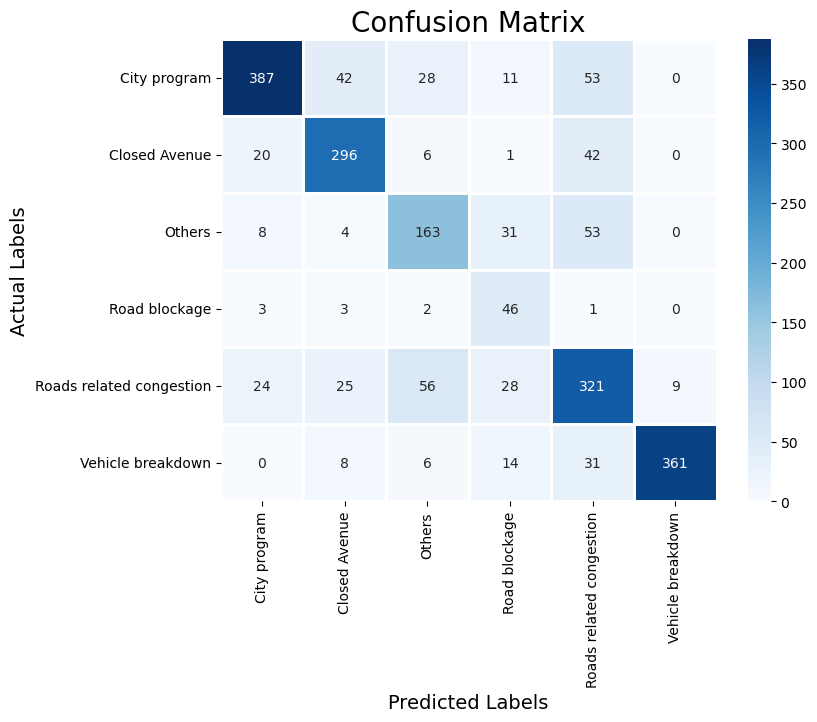

In [10]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (8, 6))
cm = pd.DataFrame(cm , index = [i for i in labels] , columns = [i for i in labels])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [11]:
# return (y_test, prediction)
print(classification_report(y_test, y_pred))
f1 = f1_score(y_true = y_test, y_pred = y_pred, labels = labels, average = 'micro')

print('F1-score: ',f1*100,'%')

                          precision    recall  f1-score   support

            City program       0.88      0.74      0.80       521
           Closed Avenue       0.78      0.81      0.80       365
                  Others       0.62      0.63      0.63       259
           Road blockage       0.35      0.84      0.49        55
Roads related congestion       0.64      0.69      0.67       463
       Vehicle breakdown       0.98      0.86      0.91       420

                accuracy                           0.76      2083
               macro avg       0.71      0.76      0.72      2083
            weighted avg       0.78      0.76      0.76      2083

F1-score:  75.5640902544407 %


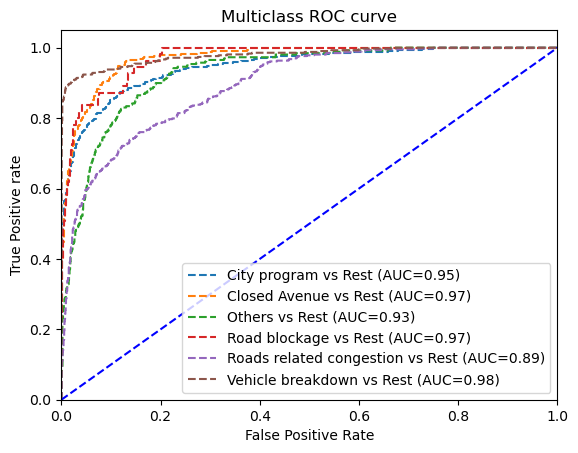

In [12]:
from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve,auc
pred_prob = pred_proba
from sklearn.preprocessing import label_binarize
#binarize the y_values

classes = np.unique(y_test)
y_test_binarized=label_binarize(y_test,classes=np.unique(y_test))

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

# n_class = len(labels)

for i in range(len(classes)):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], pred_prob[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

    # plotting
    plt.plot(fpr[i], tpr[i], linestyle='--',
             label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))

plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()

In [13]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import roc_auc_score
accuracy = accuracy_score(y_test, y_pred)
precision, recall, fscore,_  = score(y_test, y_pred, average='macro')
roc_auc = roc_auc_score(y_test, pred_prob,multi_class='ovr')
print('Accuracy, precision, recall, fscore, Roc-AUC')
print('{:.3f},{:.3f},{:.3f},{:.3f},{:.3f}'.format(accuracy,precision,recall,fscore,roc_auc))

Accuracy, precision, recall, fscore, Roc-AUC
0.756,0.708,0.762,0.717,0.948


In [14]:
import sys

with open(outputFilename, 'a') as f:
    print('GNB-w2v,{:.3f},{:.3f},{:.3f},{:.3f},{:.3f}'.format(accuracy,precision,recall,fscore,roc_auc), file=f)

## With Infersent Embedding

In [15]:
X = pd.read_csv(path+'kolkata_infercent_4096.csv')
Y = pd.read_csv(path+'kolkata_classLabel_named.csv')
print(X.shape,Y.shape)

(8329, 4096) (8329, 2)


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, Y['label'])
print(X_train.shape, X_test.shape)

(6246, 4096) (2083, 4096)


In [17]:
model = GaussianNB()
model.fit(X_train,y_train)


GaussianNB()

In [18]:
y_pred = model.predict(X_test)
pred_proba = model.predict_proba(X_test)
pred_proba

array([[0.00000000e+000, 1.00000000e+000, 7.15580106e-173,
        0.00000000e+000, 1.09188023e-124, 0.00000000e+000],
       [1.55519305e-163, 1.00000000e+000, 1.01462127e-229,
        0.00000000e+000, 7.03095913e-069, 0.00000000e+000],
       [1.00000000e+000, 2.36439244e-030, 0.00000000e+000,
        8.49249554e-191, 3.04289445e-134, 0.00000000e+000],
       ...,
       [1.21728518e-010, 7.90123264e-116, 8.91519640e-292,
        2.49566921e-139, 1.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 2.29655147e-259, 1.00000000e+000,
        0.00000000e+000, 7.26550668e-139, 0.00000000e+000],
       [1.00000000e+000, 2.09677154e-142, 0.00000000e+000,
        2.07980533e-285, 8.39936608e-218, 0.00000000e+000]])

In [19]:
# return (y_test, prediction)
print(classification_report(y_test, y_pred))
f1 = f1_score(y_true = y_test, y_pred = y_pred, labels = labels, average = 'micro')

print('F1-score: ',f1*100,'%')

                          precision    recall  f1-score   support

            City program       0.69      0.84      0.76       557
           Closed Avenue       0.56      0.51      0.54       347
                  Others       0.52      0.47      0.49       282
           Road blockage       0.79      0.63      0.70        59
Roads related congestion       0.69      0.66      0.68       428
       Vehicle breakdown       1.00      0.91      0.95       410

                accuracy                           0.71      2083
               macro avg       0.71      0.67      0.69      2083
            weighted avg       0.71      0.71      0.71      2083

F1-score:  70.81132981277004 %


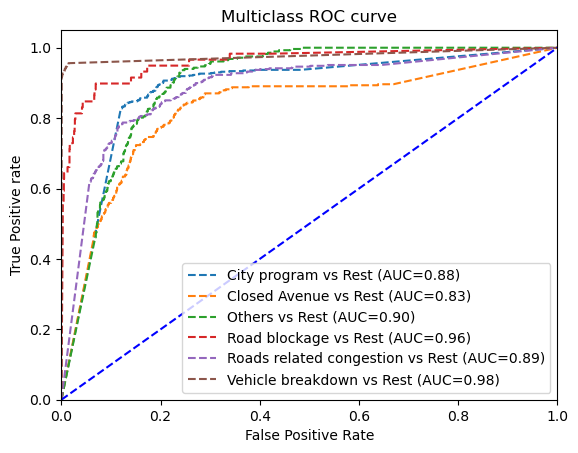

In [20]:
from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve,auc
pred_prob = pred_proba
from sklearn.preprocessing import label_binarize
#binarize the y_values

classes = np.unique(y_test)
y_test_binarized=label_binarize(y_test,classes=np.unique(y_test))

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

# n_class = len(labels)

for i in range(len(classes)):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], pred_prob[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

    # plotting
    plt.plot(fpr[i], tpr[i], linestyle='--',
             label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))

plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()

In [21]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import roc_auc_score
accuracy = accuracy_score(y_test, y_pred)
precision, recall, fscore,_  = score(y_test, y_pred, average='macro')
roc_auc = roc_auc_score(y_test, pred_prob,multi_class='ovr')
print('Accuracy, precision, recall, fscore, Roc-AUC')
print('{:.3f},{:.3f},{:.3f},{:.3f},{:.3f}'.format(accuracy,precision,recall,fscore,roc_auc))

Accuracy, precision, recall, fscore, Roc-AUC
0.708,0.708,0.671,0.686,0.905


In [22]:
import sys

with open(outputFilename, 'a') as f:
    print('GNB-infercent,{:.3f},{:.3f},{:.3f},{:.3f},{:.3f}'.format(accuracy,precision,recall,fscore,roc_auc), file=f)